In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
train = pd.read_csv('train.csv')

In [180]:
target = 'SalePrice'
y = train[target]
train.drop(['Id','SalePrice', 'Utilities', 'MiscVal'], axis=1, inplace=True)
numeric =['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
          'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', '1stFlrSF',  '2ndFlrSF',  'LowQualFinSF',
          'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
          'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
          'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',
          'ScreenPorch', 'PoolArea', ]
extra = ['MoSold', 'YrSold']
categoric = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
            'LandContour', 'LotConfig', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
            'HouseStyle','OverallQual', 'OverallCond', 'RoofStyle',
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
            'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
            'SaleCondition', 'Electrical']

In [181]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

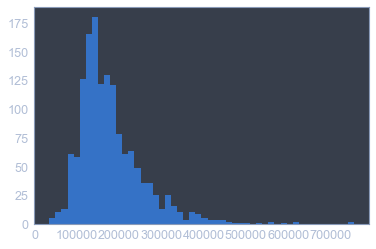

In [182]:
plt.hist(y, bins=50);

In [183]:
train.shape

(1460, 77)

In [184]:
len(numeric)

30

In [185]:
def numeric_outliers(df, cols):
    X = df[cols].copy()
    for c in cols:
        perc_1 = np.nanpercentile(X[c].values, 1)
        perc_99 = np.nanpercentile(X[c].values, 99)
        X[c].clip(perc_1, perc_99, inplace=True)
    return X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000


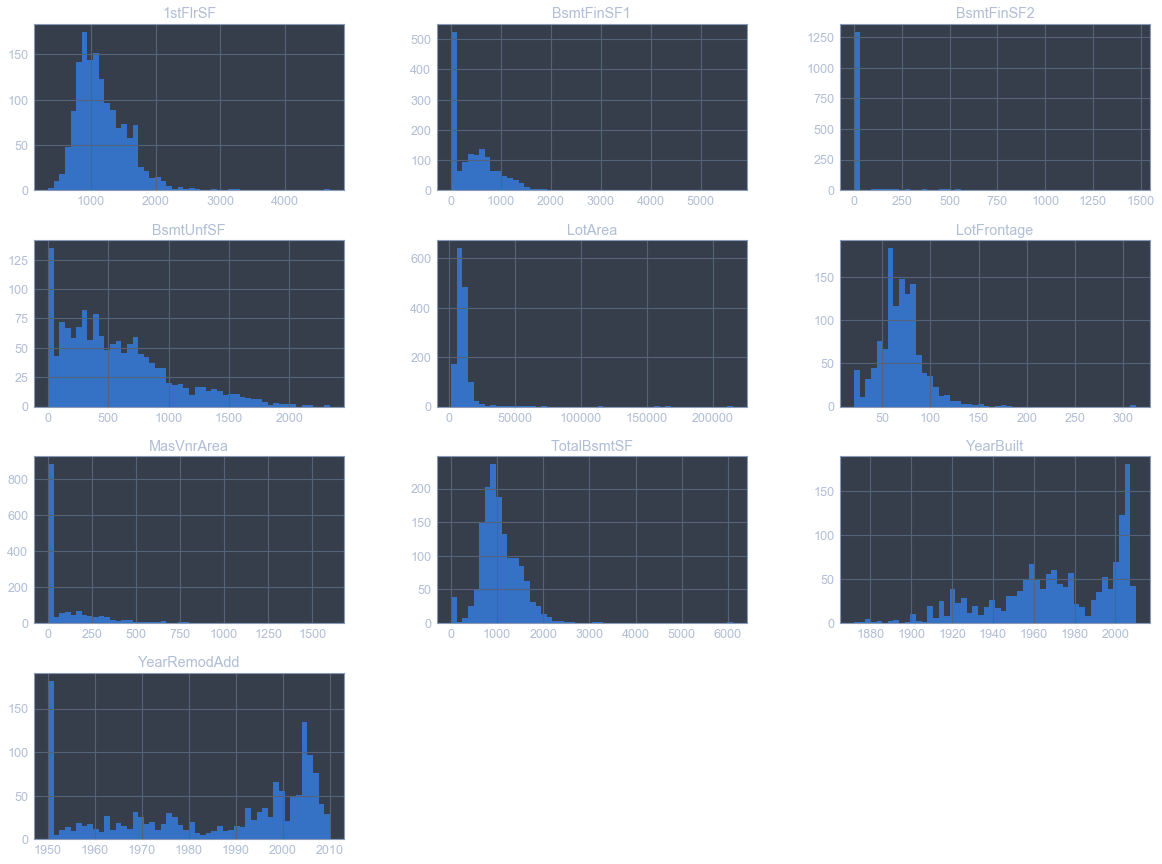

In [186]:
train[numeric[:10]].hist(bins=50, figsize=(20, 15));
train[numeric[:10]].describe()

In [187]:
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
     'TotalBsmtSF', '1stFlrSF']
train[cols] = numeric_outliers(train, cols)

,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808
std,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393
min,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000
50%,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000
75%,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000
max,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000


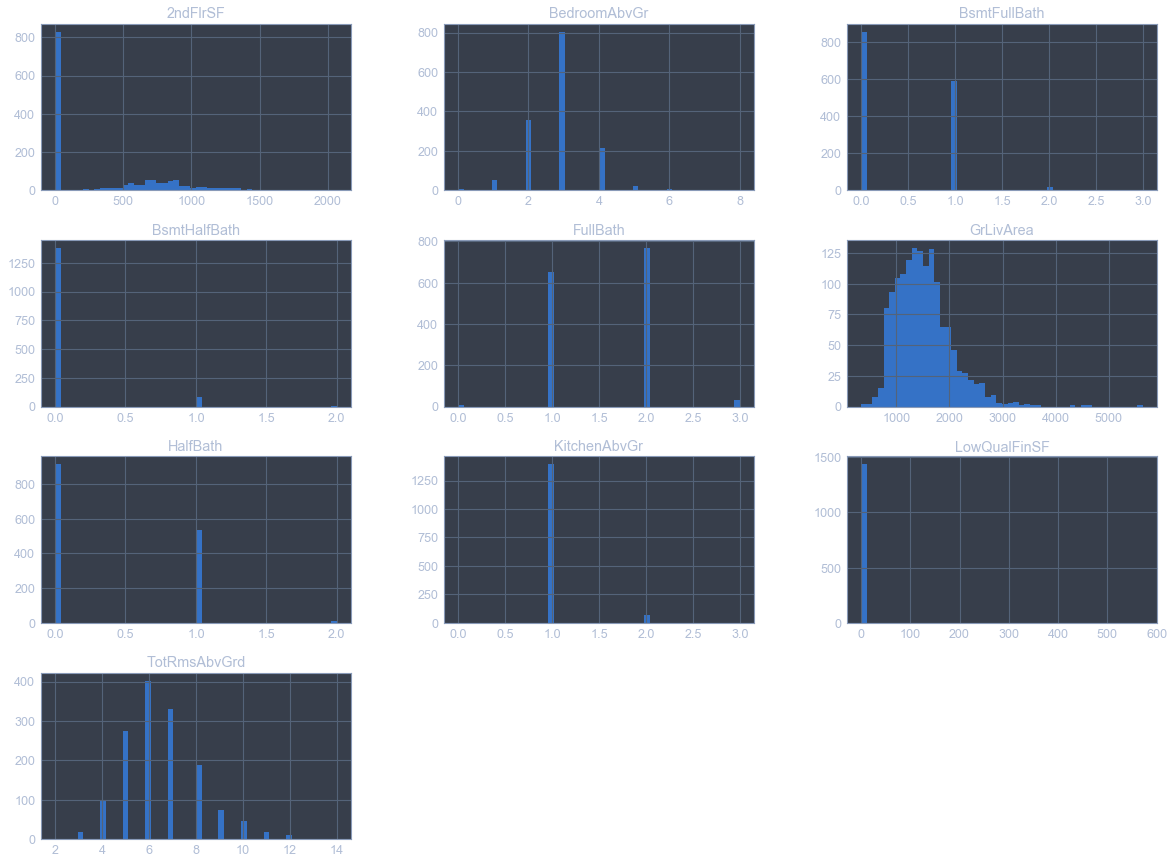

In [188]:
train[numeric[10:20]].hist(bins=50, figsize=(20, 15));
train[numeric[10:20]].describe()

In [189]:
cols =['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']

train[cols] = numeric_outliers(train, cols)

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


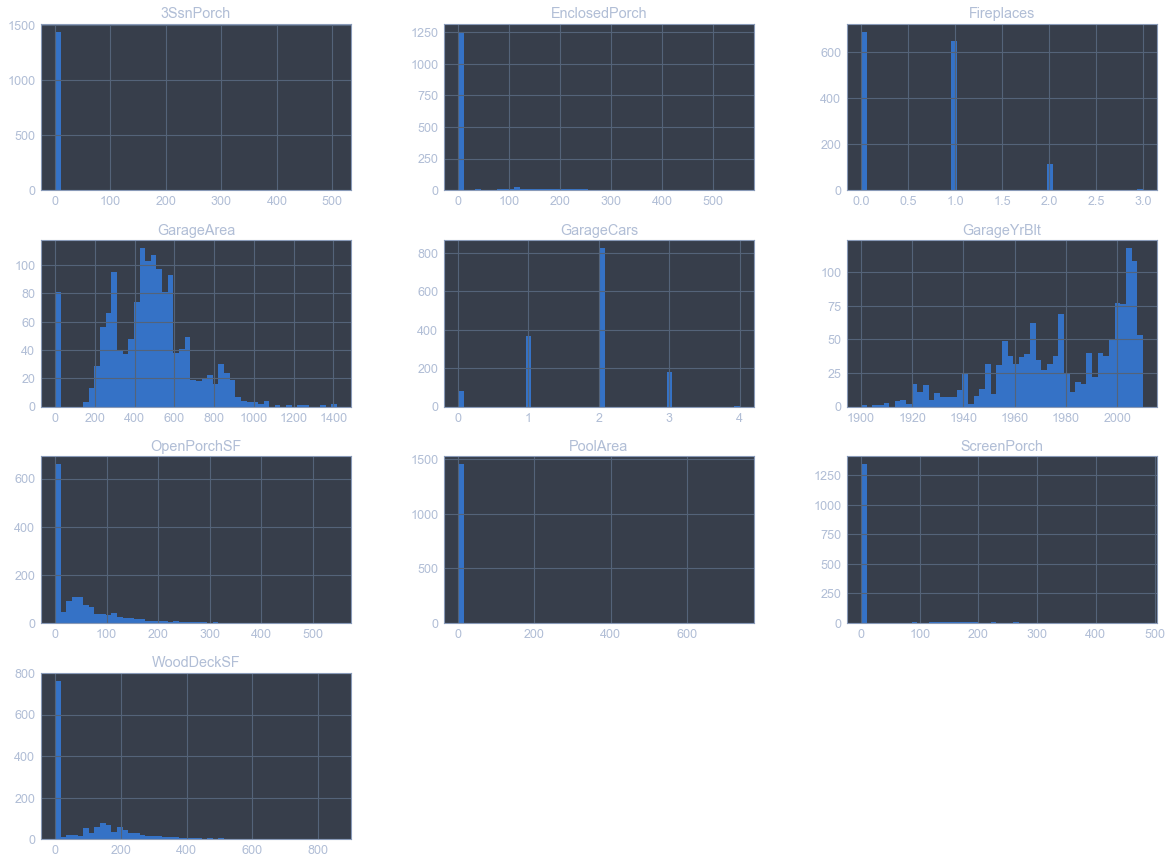

In [190]:
train[numeric[20:]].hist(bins=50, figsize=(20, 15));
train[numeric[20:]].describe()

In [191]:
cols = ['Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

train[cols] = numeric_outliers(train, cols)

In [192]:
train[numeric].isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
dtype: int64

In [193]:
display(train['LotFrontage'].describe())
display(train['MasVnrArea'].describe())
display(train['GarageYrBlt'].describe())

count    1201.000000
mean       69.600333
std        21.723531
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       141.000000
Name: LotFrontage, dtype: float64

count    1452.000000
mean      101.174793
std       168.046772
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max       791.920000
Name: MasVnrArea, dtype: float64

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [194]:
from sklearn.impute import SimpleImputer

In [195]:
num_imputer = SimpleImputer(strategy='constant', fill_value=0)
train[numeric] = num_imputer.fit_transform(train[numeric])

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()
train[numeric] = scaler.fit_transform(train[numeric])

In [198]:
len(categoric)

45

In [199]:
train[categoric[:15]].isna().sum()

MSSubClass         0
MSZoning           0
Street             0
Alley           1369
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
dtype: int64

In [200]:
train[categoric[15:30]].isna().sum()

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Heating          0
HeatingQC        0
dtype: int64

In [201]:
train[categoric[30:]].isna().sum()

CentralAir          0
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
Electrical          1
dtype: int64

In [202]:
cat1_imputer = SimpleImputer(strategy='constant', fill_value='Doesnt Has')
cat1 = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature']
train[cat1] = cat1_imputer.fit_transform(train[cat1])
cat2 = list(set(categoric) - set(cat1))
cat2_imputer = SimpleImputer(strategy='most_frequent')
train[cat2] = cat2_imputer.fit_transform(train[cat2])

In [203]:
from sklearn.preprocessing import OrdinalEncoder

In [204]:
encoder = OrdinalEncoder()
train[categoric] = encoder.fit_transform(train[categoric])

In [205]:
train[extra].head()

,MoSold,YrSold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008


In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(train, y)

In [208]:
y_perc_1 = np.nanpercentile(y_train, 1)
y_perc_99 = np.nanpercentile(y_train, 99)
y_train = y_train.clip(y_perc_1, y_perc_99).values

In [209]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [212]:
params = [{
    'learning_rate': [0.025, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'n_estimators': [100, 120, 140],
    'subsample': [0.4, 0.6, 0.8]
}]

clf = GridSearchCV(GradientBoostingRegressor(), param_grid=params, 
                   cv=5, scoring='neg_mean_squared_log_error')
clf.fit(X_train, y_train)
np.sqrt(-clf.best_score_), clf.best_params_

(0.1279847750580779,
 {'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 140,
  'subsample': 0.4})

In [213]:
np.sqrt(mean_squared_log_error(clf.predict(X_test), y_test))

0.11941727790266814

In [220]:
test = pd.read_csv('test.csv')

In [221]:
test[numeric] = numeric_outliers(test, numeric)

In [222]:
test[numeric] = num_imputer.transform(test[numeric])

In [223]:
test[numeric] = scaler.transform(test[numeric])

In [224]:
test[cat1] = cat1_imputer.transform(test[cat1])
test[cat2] = cat2_imputer.transform(test[cat2])

In [227]:
test['MSSubClass'].replace(150, 120, inplace=True)
test['MiscVal'].replace([420, 900, 6500, 455, 1000, 17000, 650, 490, 
                         300, 460, 1512, 750, 80, 4500, 12500, 3000, 1500], 0, inplace=True)

In [228]:
test[categoric] = encoder.transform(test[categoric])

In [230]:
y_pred = clf.predict(test.drop(['Id', 'Utilities', 'MiscVal'], axis=1))

In [231]:
answer = pd.DataFrame({'Id': test['Id'].values, 'SalePrice': y_pred})

In [232]:
answer.to_csv('submission.csv', index=False)